# Analyzing Selling Price of used cars using Python

Analyzing the selling price of used cars is essential for making informed decisions in the automotive market. Using Python, we can efficiently process and visualize data to uncover key factors influencing car prices. This analysis not only aids buyers and sellers but also enables predictive modeling for future price estimation. This article will explore how to analyze the selling price of used cars using Python.

### Step 1: Understanding the dataset

The dataset contains various attributes of used cars, including price, brand, color, horsepower and more. Our goal is to analyze these factors and determine their impact on selling price.

*Problem Statement: Our friend Otis wants to sell his car but isn't sure about the price. He wants to maximize profit while ensuring a reasonable deal for buyers. To help Otis we will analyze the dataset and determine the factors affecting car prices.*

### Step 2: Import required Python Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

### Step 3: Load dataset into Pandas Dataframe

In [10]:
df=pd.read_csv('p:/AI_Learn/ML/CarsSellingPrices.csv')
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


### Step 4: Assign Column headers

In [11]:
headers = ["symboling", "normalized-losses", "make",
           "fuel-type", "aspiration","num-of-doors",
           "body-style","drive-wheels", "engine-location",
           "wheel-base","length", "width","height", "curb-weight",
           "engine-type","num-of-cylinders", "engine-size",
           "fuel-system","bore","stroke", "compression-ratio",
           "horsepower", "peak-rpm","city-mpg","highway-mpg","price"]
df.columns=headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


### Step 5: Check for Missing values

In [15]:
df.isnull().any()
df.isna().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [16]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [18]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### Step 6: Convert Price column to integer

In [24]:
df.price.unique()
data=df.copy()
data=data[data.price !='?']
data['price']=data['price'].astype(int)
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

### Step 7: Normalize Features

In [31]:
data['length']=data['length']/data['length'].max()
data['width']=data['width']/data['width'].max()
data['height']=data['height']/data['height'].max()

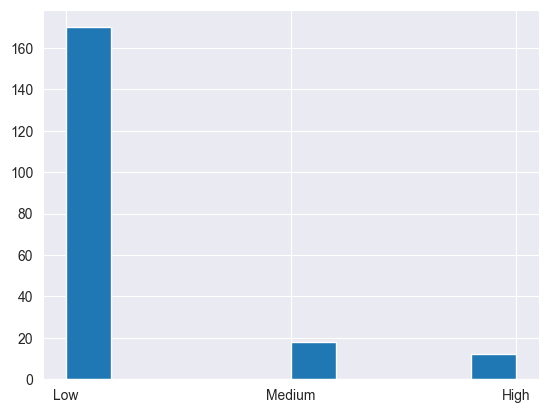

In [33]:
# binning - grouping values
bins = np.linspace(min(data['price']),max(data['price']),4)
group_names=['Low','Medium','High']
data['price-binned']=pd.cut(data['price'],bins,labels=group_names, include_lowest=True)
plt.hist(data['price-binned'])
plt.show()

### Step 8: Convert Categorical data into Numerical

Machine learning models require numerical data. We convert categorical variables into numerical ones using one-hot encoding:

In [41]:
dummies=pd.get_dummies(data['fuel-type']).head()
data1=pd.concat([data,dummies], axis='columns')
data1.drop('fuel-type',axis=1,inplace=True)
data1.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price-binned,diesel,gas
0,3,?,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000,21,27,16500,Low,False,True
1,1,?,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000,19,26,16500,Low,False,True
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.4,10.0,102,5500,24,30,13950,Low,False,True
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.4,8.0,115,5500,18,22,17450,Low,False,True
4,2,?,audi,std,two,sedan,fwd,front,99.8,0.851994,...,3.4,8.5,110,5500,19,25,15250,Low,False,True


### Step 9: Data Visualization

{'whiskers': [<matplotlib.lines.Line2D at 0x1e62c2d3250>,
 'caps': [<matplotlib.lines.Line2D at 0x1e62c2d34d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e62c2d3110>],
 'medians': [<matplotlib.lines.Line2D at 0x1e62c2d3750>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e62c2d3890>],
 'means': []}

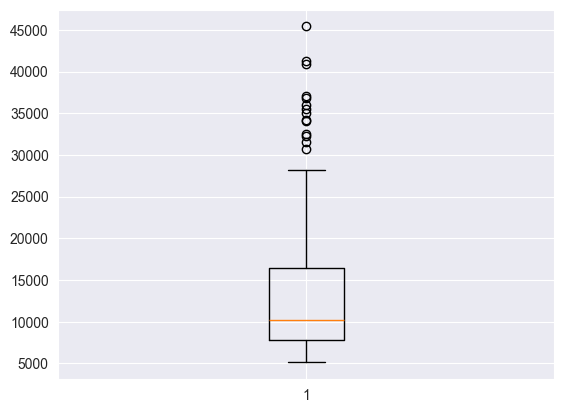

In [45]:
plt.boxplot(data1['price'])

<Axes: xlabel='drive-wheels', ylabel='price'>

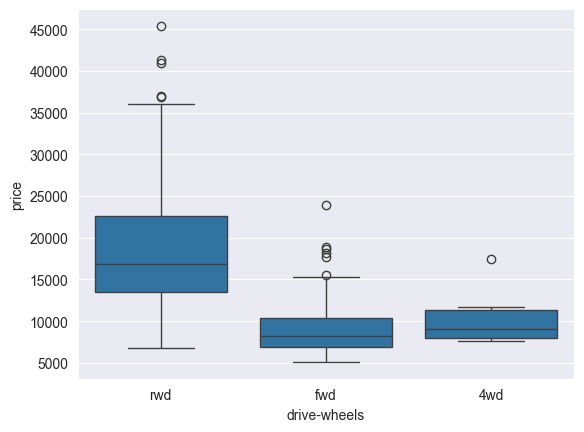

In [46]:
sns.boxplot(x='drive-wheels',y='price',data=data1)

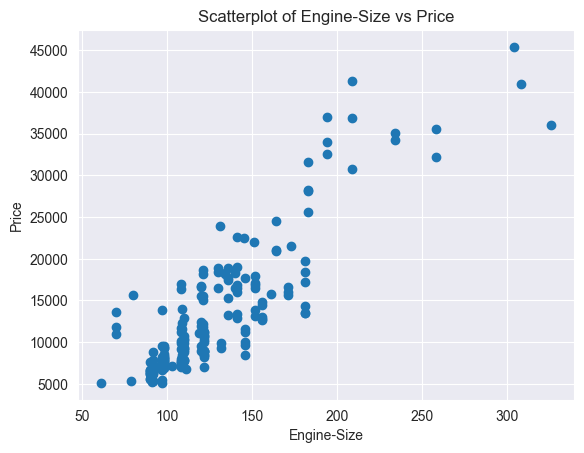

In [55]:
plt.scatter(data['engine-size'],data['price'])
plt.title('Scatterplot of Engine-Size vs Price')
plt.xlabel('Engine-Size')
plt.ylabel('Price')
plt.show()

### Step 10: Grouping Data by Drive-Wheels and Body-Style
Grouping data helps identify trends based on key variables:

In [69]:
test=data1[['drive-wheels','body-style','price']]
data_grp = test.groupby(['drive-wheels', 'body-style'],as_index = False).mean()
data_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


### Step 11: Create a Pivot table and a Heat Map

In [70]:
data_pivot = data_grp.pivot(index='drive-wheels',columns='body-style',values='price')
data_pivot

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,NaN,NaN,7603.000000,12647.333333,9095.750000
fwd,11595.00,8249.000000,8396.387755,9811.800000,9997.333333
rwd,26563.25,24202.714286,14337.777778,21711.833333,16994.222222


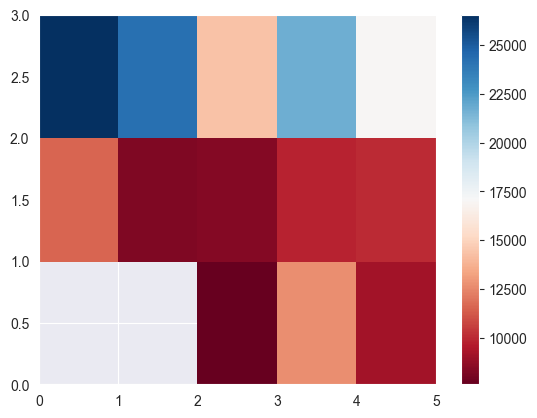

In [74]:
plt.pcolor(data_pivot,cmap='RdBu')
plt.colorbar()
plt.show()

### Step 12: Perform ANOVA test
The Analysis of Variance (ANOVA) test shows if different groups have significantly different means

F_onewayResult(statistic=np.float64(0.19744030127462608), pvalue=np.float64(0.6609478240622193))


(0.0, 53259.309524654636)

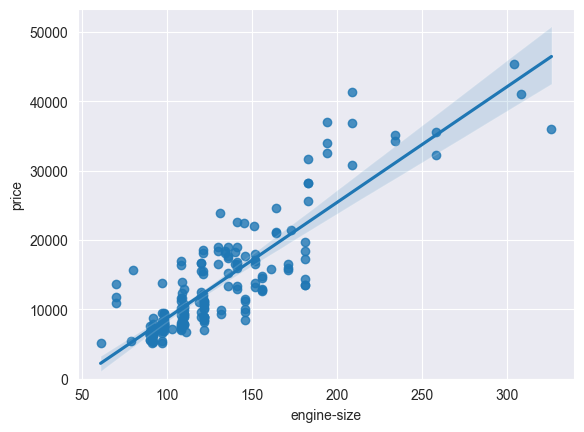

In [95]:
data_anova=data1[['make','price']]
grouped_anova=data_anova.groupby(['make'])
anova_results_1=sp.stats.f_oneway(grouped_anova.get_group(('honda',))['price'],grouped_anova.get_group(('subaru',))['price'])
print(anova_results_1)
sns.regplot(x='engine-size',y='price',data=data1)
plt.ylim(0,)

This step by step analysis helps us in identifying factors that affect the selling price of used cars.
Proper data cleaning, visualization and statistical tests ensure that our findings are accurate and insightful.